In [1]:
%load_ext sql

In [2]:
%matplotlib inline

In [3]:
%sql postgresql://appdev@data/appdev

'Connected: appdev@appdev'

Assignment C

In [5]:
%sql Select * from geonames order by population DESC limit 1;

1 rows affected.


geonameid,name,longitude,latitude,feature_class,feature_code,country_code,admin1_code,admin2_code,population,elevation,timezone
305104,Levant,36.0,34.0,L,RGN,None,None,None,44990000,None,Asia/Beirut


Assignment B - without the limit of 100 the result is 115070 rows

In [17]:
%sql SELECT point(geonames.longitude, geonames.latitude) <-> point(36,34) AS Distance from geonames where geonameid != 305104 limit 100;

100 rows affected.


distance
35.5187260391022
35.5403912827645
35.4976906065648
35.5211340049413
35.5230848613757
35.5756544866359
35.3803392045427
35.5686877257961
35.4524960679527
35.5086914894509


Assignment C

In [19]:
%%sql CREATE OR REPLACE FUNCTION public.geodistance(alat double precision, alng double precision, blat double precision, blng double precision)
  RETURNS double precision AS
$BODY$
SELECT asin(
  sqrt(
    sin(radians($3-$1)/2)^2 +
    sin(radians($4-$2)/2)^2 *
    cos(radians($1)) *
    cos(radians($3))
  )
) * 7926.3352 AS distance;
$BODY$
  LANGUAGE sql IMMUTABLE
  COST 100;

Done.


[]

without the limit of 100 the result is 115070 rows

In [28]:
%sql SELECT geodistance(geonames.latitude, geonames.longitude, 34, 36) AS Distance from geonames where geonameid != 305104 limit 100;

100 rows affected.


distance
1948.31948131202
1948.97544410187
1946.67835552112
1948.51401122396
1948.68370586011
1951.17402268074
1940.93606757186
1950.34910315871
1944.25406670841
1947.84095795632


Assigment D

In [31]:
result = %sql Select longitude, latitude from geonames order by population DESC limit 1000;

1000 rows affected.


In [37]:
%matplotlib inline

In [39]:
import matplotlib.pyplot as plt

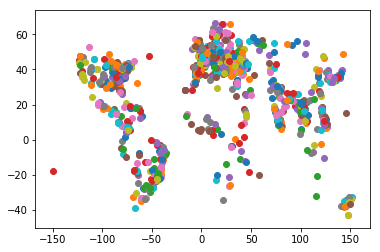

In [61]:
for Result in result:
    plt.scatter(Result[0],Result[1])

Part 2

Assignment A

In [76]:
%sql SELECT data -> 'name' as card FROM cards WHERE data @> '{"artist":"Rob Alexander"}';

401 rows affected.


card
Beacon of Immortality
Kavu Climber
Llanowar Wastes
Shivan Reef
Sulfurous Springs
Treetop Village
Plains
Forest
Badlands
Lance


Assignment B

In [85]:
%sql SELECT data -> 'name' as card FROM cards WHERE data @> '{"subtypes":"Human"}' limit 1;

0 rows affected.


card


In [83]:
%sql SELECT data FROM cards limit 1

1 rows affected.


data
"{'id': 'ab1ab474019e4e76c66e2b524d354cb7c3212616', 'cmc': 7, 'name': ""Ancestor's Chosen"", 'text': ""First strike (This creature deals combat damage before creatures without first strike.)\nWhen Ancestor's Chosen enters the battlefield, you gain 1 life for each card in your graveyard."", 'type': 'Creature — Human Cleric', 'power': '4', 'types': ['Creature'], 'artist': 'Pete Venters', 'colors': ['White'], 'flavor': '""The will of all, by my hand done.""', 'layout': 'normal', 'number': '1', 'rarity': 'Uncommon', 'manaCost': '{5}{W}{W}', 'subtypes': ['Human', 'Cleric'], 'imageName': ""ancestor's chosen"", 'mciNumber': '1', 'toughness': '4', 'multiverseid': 130550, 'colorIdentity': ['W']}"


Assignment C Group all the cards based on the colour. Aggregate them by counting the number of cards per colour.

In [93]:
colorResult = %sql SELECT data -> 'colors' as color, count(*) FROM cards group by data -> 'colors' order by count(*)

32 rows affected.


<Container object of 32 artists>

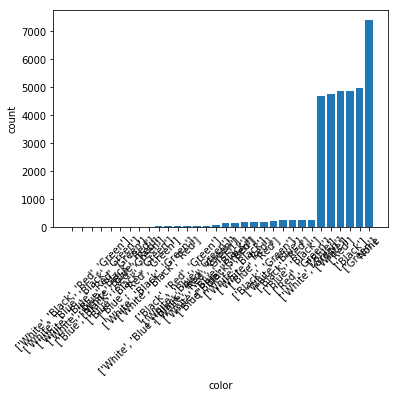

In [94]:
colorResult.bar()